# Project 1: Do you know the happiest place on earth?

---

## Group Members: Melina Tinoco, Alexia Guevara, Joshua Leavitt, Leo Antinozzi

### Project Description/Outline:

#### We will use this data set to analyze the most and least happy countries and continents. This analysis will be conducted using the overall happiness rating, and seek to find correlations between happiness and other factors such as Per Capita GDP, Generosity, Healthy Life Expectancy, etc.. 

#### Questions to be answered: See Proposal PDF or Readme

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets


happiness_data_path = "Resources/world-happiness-report.csv"
happiness_data_2021_path = "Resources/world-happiness-report-2021.csv"

happiness_data = pd.read_csv(happiness_data_path)
happiness_data_2021 = pd.read_csv(happiness_data_2021_path)


In [2]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    regression_vals = x_values * slope + intercept
    regression_line= "y = " + str((slope,2)) + "x + " + str((intercept,2))
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regression_vals,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(regression_line, text_coordinates, fontsize=20, color="blue")
    plt.title(title)


In [3]:
happiness_df = pd.DataFrame(happiness_data)
happiness_df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
happiness_2021_df = pd.DataFrame(happiness_data_2021)
happiness_2021_df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


---

### What is the happiest country?

In [5]:
#Code for Happiest Countr
happiest_countries = happiness_2021_df.copy()
happiest_country_df = pd.DataFrame(happiest_countries)

happiest_country_clean_df = happiest_country_df.iloc[:,[0,1,2]].copy()

happiest = happiest_country_df.loc[happiest_country_df['Ladder score'].idxmax()]

happiest_mean = happiest_country_df['Ladder score'].mean()

happiest_median = happiest_country_df['Ladder score'].median()

happiest = happiest['Country name']

print(f"The happiest country in the world is {happiest}")
print(f"The mean and meadian Happines Ladder scores are {happiest_mean} and {happiest_median} respectively")
happiest_country_clean_df.sort_values('Ladder score', ascending=False).head()

happiest_country_clean_df.to_csv('Output_figs/Happiest_country_clean.csv')
happiest_country_clean_df.sort_values('Ladder score', ascending=False).head()


The happiest country in the world is Finland
The mean and meadian Happines Ladder scores are 5.532838926174497 and 5.534 respectively


,Country name,Regional indicator,Ladder score
0,Finland,Western Europe,7.842
1,Denmark,Western Europe,7.620
2,Switzerland,Western Europe,7.571
3,Iceland,Western Europe,7.554
4,Netherlands,Western Europe,7.464


<Axes: title={'center': 'Ladder Score Box Plot'}>

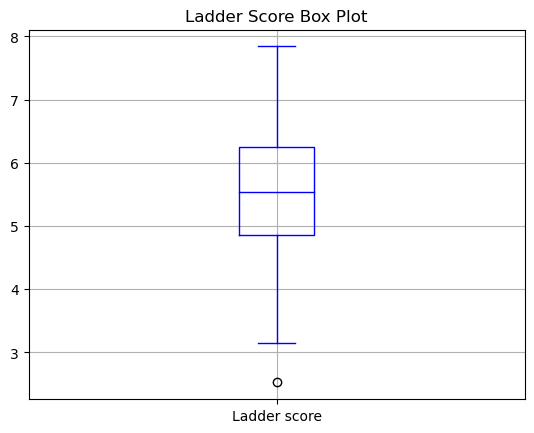

In [30]:
bplt = happiest_country_clean_df.boxplot(column = 'Ladder score', color="blue")

plt.title('Ladder Score Box Plot')

plt.savefig("Output_figs/BoxPlot.png")

bplt

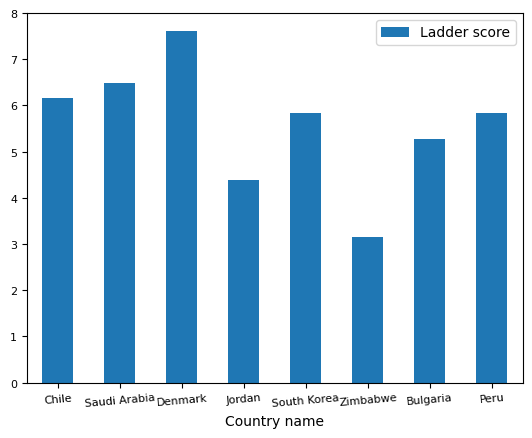

In [13]:
#Plot Happiness by Country
happy_country_plot = happiest_country_clean_df.sort_values('Ladder score', ascending=False).sample(8)


happy_country_plot.plot(x="Country name", y="Ladder score", kind="bar", rot=5, fontsize=8)

plt.savefig('Output_figs/Happiness_graph.png')

### What is the least happy country? 

In [7]:
# Code here dot size?

### What is the happiest continent?

In [8]:
# Code here dot size?

### What is the least happy continent?

In [9]:
# Code here dot size?

### Is there a correlation between happiness and social support?

In [10]:
# Code here, linear regress/line plot?

### Is there a correlation between happiness and freedom to make life choices?

In [11]:
# Code here, linear regress/line plot?

### Is there a correlation between happiness and GDP?

In [15]:
# Code here, linear regress/line plot?

### Is there a correlation between happiness and generosity?

In [16]:
# Code here, linear regress/line plot?

### Is there a correlation between happiness and perception of corruption?

In [23]:
# Code here, linear regress/line plot?

corruption = happiness_2021_df.copy()
corruption_df = pd.DataFrame(corruption)

corruption_clean_df = corruption_df.iloc[:,[0,1,11,2]].copy()

corrupt = corruption_clean_df.loc[corruption_clean_df['Perceptions of corruption'].idxmax()]

corrupt_mean = corruption_clean_df['Perceptions of corruption'].mean()


corrupt_median = corruption_clean_df['Perceptions of corruption'].median()

corrupt = corrupt['Country name']

print(f"The country with the highest perception of corruption in the world is {corrupt}.")
print(f"The mean and meadian perceptions of corruption scores are {corrupt_mean} and {corrupt_median} respectively")
corruption_clean_df.to_csv('Output_figs/Corruption_df.csv')
corruption_clean_df.sort_values('Perceptions of corruption', ascending=False).head()



The country with the highest perception of corruption in the world is Croatia.
The mean and meadian perceptions of corruption scores are 0.7274496644295303 and 0.781 respectively


,Country name,Regional indicator,Perceptions of corruption,Ladder score
59,Croatia,Central and Eastern Europe,0.939,5.882
45,Romania,Central and Eastern Europe,0.938,6.140
87,Bulgaria,Central and Eastern Europe,0.932,5.266
63,Bosnia and Herzegovina,Central and Eastern Europe,0.931,5.813
148,Afghanistan,South Asia,0.924,2.523


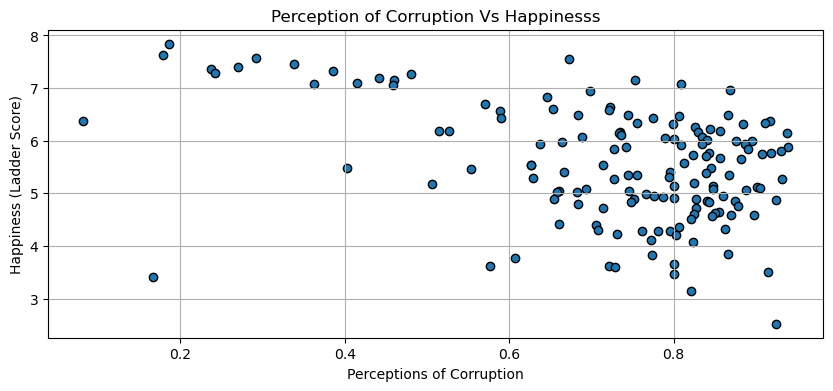

In [19]:
plt.figure(figsize=[10,4])
plt.title("Perception of Corruption Vs Happinesss")
plt.scatter(corruption_clean_df["Perceptions of corruption"], corruption_clean_df["Ladder score"], linewidth=1, edgecolor="black")
plt.ylabel("Happiness (Ladder Score)")
plt.xlabel("Perceptions of Corruption")
plt.grid()


plt.savefig("Output_figs/Corruptionfig.png")

The r-value is: -0.421140
 y = -2.5234695955775135 x + 7.368536036675482


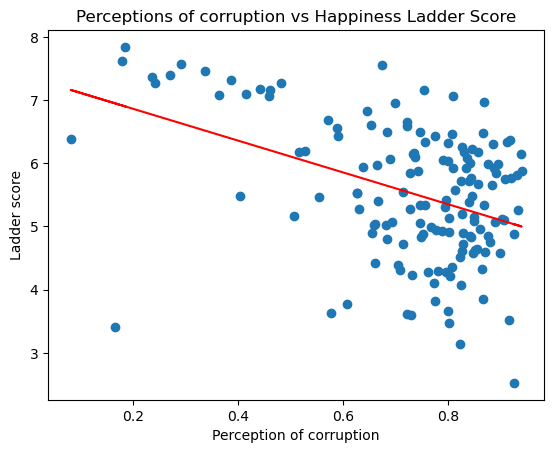

In [17]:
x_values = corruption_clean_df["Perceptions of corruption"]
y_values = corruption_clean_df["Ladder score"]

res = (linregress(x_values, y_values))

print(f"The r-value is: {res.rvalue:.6f}")
print(f" y = {res.slope} x + {res.intercept}")

plt.savefig('Output_figs/CorruptionRegression.png')

plot_linear_regression(x_values,
                       y_values,
                       'Perceptions of corruption vs Happiness Ladder Score',
                       'Max Ladder score', (15,50))


plt.ylabel("Ladder score")
plt.xlabel("Perception of corruption")
plt.savefig("Output_figs/CorruptionRegression.png", dpi = 200)
plt.show()  

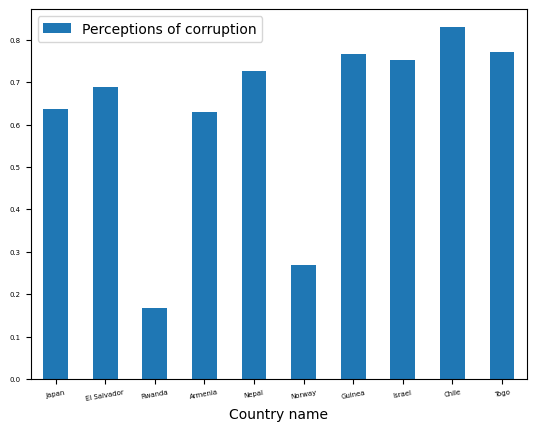

In [21]:
corruption_country_plot = corruption_clean_df.sort_values('Perceptions of corruption', ascending=False).sample(10)

corruption_country_plot.plot(x="Country name", y="Perceptions of corruption", kind="bar", rot=10, fontsize=5)
plt.savefig("Output_figs/Corruptionbarchart.png")

plt.show()

# Project 1 Conclusions:

---

## Information

### Information

#### Information

#### Information